# load important libraries

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import sklearn
from sklearn.cluster import KMeans
import seaborn as sns

# load iris dataset and normalize 

In [98]:
iris= load_iris()
data = iris.data[:,:2]
from sklearn import preprocessing
X = iris.data
# normalize the data attributes
X=preprocessing.normalize(X)
X[:10]
print('normalized 15 iris dataset ')
print(X)

normalized 15 iris dataset 
[[0.80377277 0.55160877 0.22064351 0.0315205 ]
 [0.82813287 0.50702013 0.23660939 0.03380134]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.80003025 0.53915082 0.26087943 0.03478392]
 [0.790965   0.5694948  0.2214702  0.0316386 ]
 [0.78417499 0.5663486  0.2468699  0.05808704]
 [0.78010936 0.57660257 0.23742459 0.0508767 ]
 [0.80218492 0.54548574 0.24065548 0.0320874 ]
 [0.80642366 0.5315065  0.25658935 0.03665562]
 [0.81803119 0.51752994 0.25041771 0.01669451]
 [0.80373519 0.55070744 0.22325977 0.02976797]
 [0.786991   0.55745196 0.26233033 0.03279129]
 [0.82307218 0.51442011 0.24006272 0.01714734]
 [0.8025126  0.55989251 0.20529392 0.01866308]
 [0.81120865 0.55945424 0.16783627 0.02797271]
 [0.77381111 0.59732787 0.2036345  0.05430253]
 [0.79428944 0.57365349 0.19121783 0.05883625]
 [0.80327412 0.55126656 0.22050662 0.04725142]
 [0.8068282  0.53788547 0.24063297 0.04246464]
 [0.77964883 0.58091482 0.22930848 0.0458617 ]
 [0.8173379  0.51462016 0.257310

# Visualizing the data before clustering

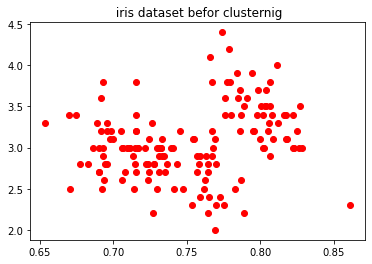

In [119]:
plt.scatter(X[:,0],data[:,1],c='red')
plt.title(' iris dataset befor clusternig')
plt.show()

# K-means Algorithm

The clustering problem is solved by an algorithm called K-means Algorithm which is a unsupervised ,non deterministic and iterative algorithm

No predefined/target labels are present in the data and the model has to classify the data on its own by discovering the hidden patterns in the given input data such problems are called Unsupervised Learning problems

K-means algorithm identifies k number of centroids and allocates every data point to the nearest cluster minimizing the sum of distances between the points and their respective cluster centroid.

The ‘means’ in the K-means refers to averaging of the data(i.e.,finding the centroid).

Steps of K means algorithm:

 step 1 Choosing the number of clusters"k".
 step 2 Randomly choose the "k" centroids and assign each point to a cluster with closest centroid .
 step 3 Repeat the following until centroids stop changing:

    For each cluster,compute the cluster centroid by taking the mean vector of the points in the cluster.
    
    Assign each data point to the cluster for which the centroid is the closest.

#  find optimal value of k

The Elbow method is used for optimizing k value.it is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

When the distortions are plotted and the plot looks like an arm then the “elbow”(the point of inflection on the curve) is the best value of k.

In [120]:
df=pd.DataFrame(iris['data'])
distortions = []
K = range(1,10)# k value starts from  upto 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

C:\Users\zati\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Plotting the distortions of K-Means

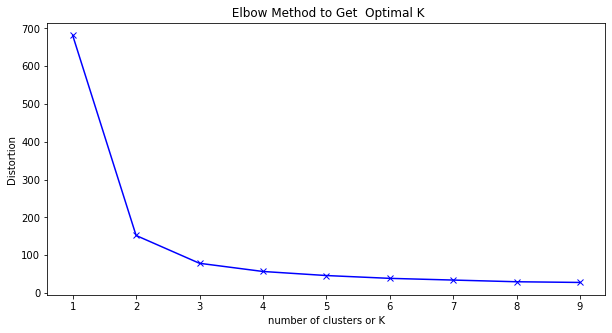

In [121]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('number of clusters or K')
plt.ylabel('Distortion')
plt.title(' Elbow Method to Get  Optimal K')
plt.show()

We can observe that the “elbow” is the number 3 which is optimal for this case

# applying kmeans to the dataset with k=3

In [114]:
k=3
kmeans= KMeans(k,init='k-means++',max_iter=300,n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(X)

# visualising the clusters

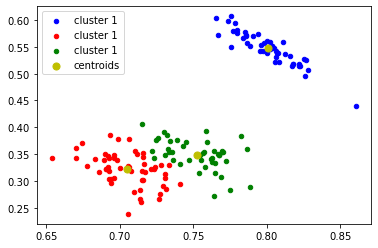

In [123]:
plt.scatter(X[y_kmeans ==0,0], X[y_kmeans== 0,1], s=20, c='b', label='cluster 1')
plt.scatter(X[y_kmeans ==1,0], X[y_kmeans== 1,1], s=20, c='r', label='cluster 1')
plt.scatter(X[y_kmeans ==2,0], X[y_kmeans== 2,1], s=20, c='g', label='cluster 1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50, c='y', label='centroids')
plt.legend()

finally we grouped the iris datasets in to three different lusters

# implementation of hierararchical clusering to iris dataset

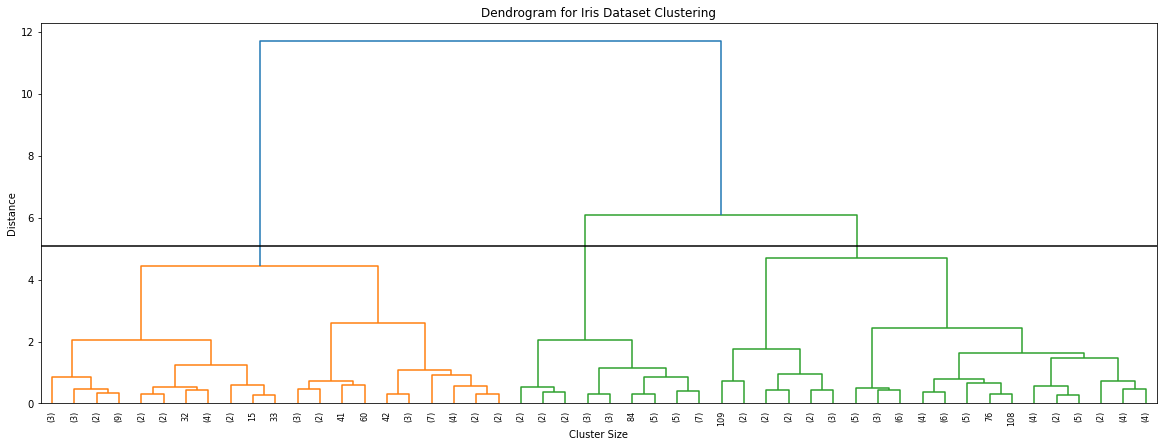

In [124]:

# Importing Hierarchical Clustering data from scipy
from scipy.cluster.hierarchy import dendrogram,linkage
Z= linkage(data,'ward')
max_d= 5.08


plt.figure(figsize=(20,7))
plt.title('Dendrogram for Iris Dataset Clustering')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
dendrogram(
Z,truncate_mode='lastp', p=50,leaf_rotation=90.,leaf_font_size=8.,)
plt.axhline(y=max_d, c='k')
plt.show()
